In [1]:
audio = "/content/input.mp3"

In [2]:
from IPython.display import Audio

In [3]:
Audio(audio)

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [5]:
signal, sr = librosa.load(audio, sr=None)

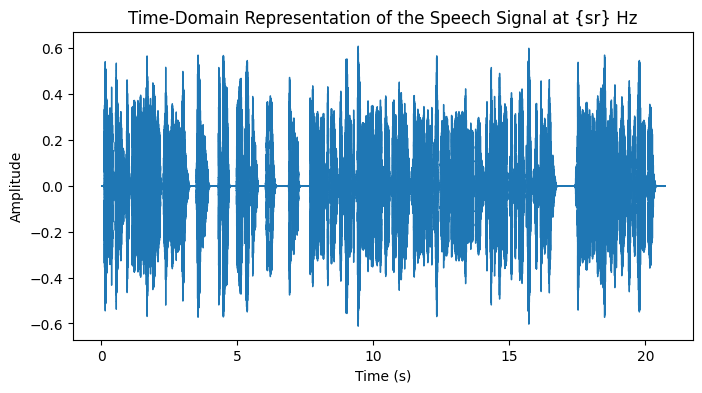

In [6]:
plt.figure(figsize=(8, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title('Time-Domain Representation of the Speech Signal at {sr} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [7]:
samp_rate = [8000, 16000, 44100]

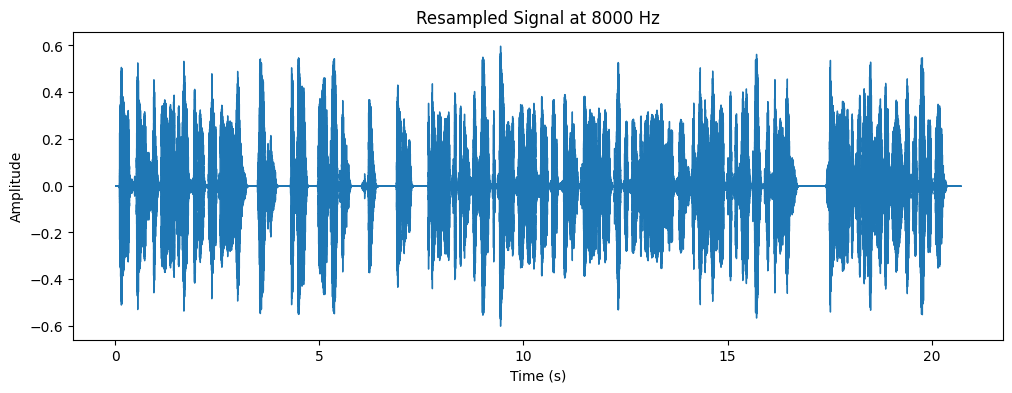

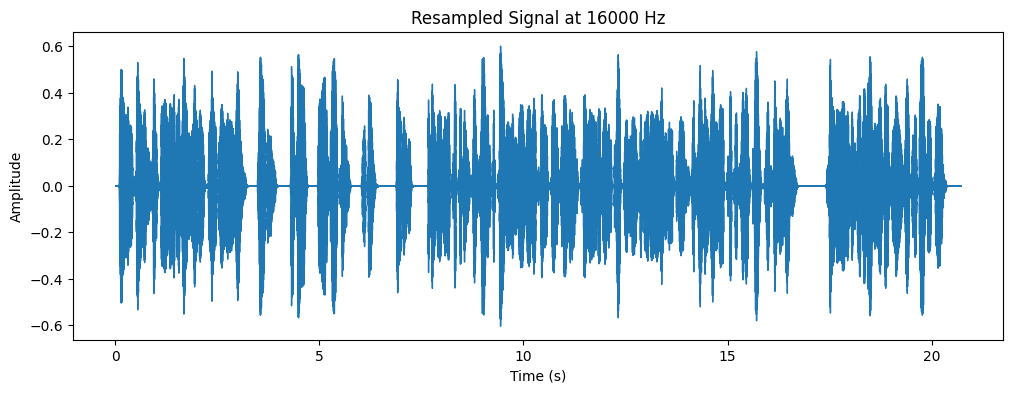

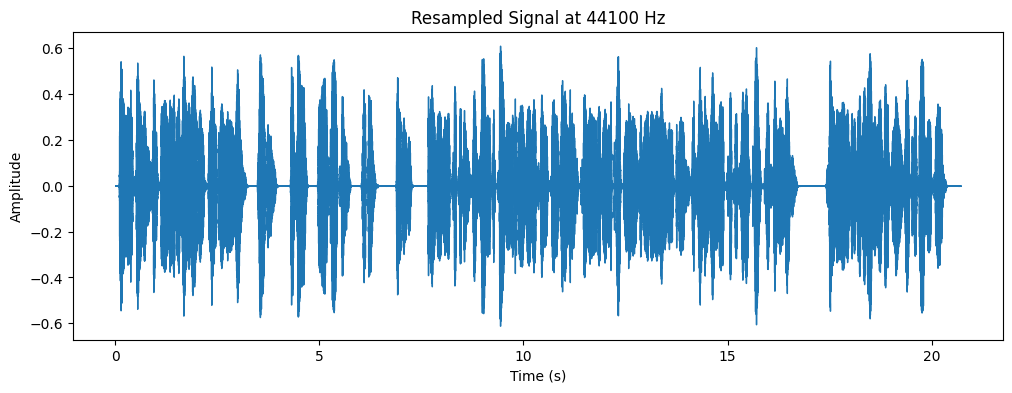

In [8]:
for newsr in samp_rate:
    resig = librosa.resample(signal, orig_sr=sr, target_sr=newsr)

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(resig, sr=newsr)
    plt.title(f'Resampled Signal at {newsr} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [9]:
import numpy as np
from scipy.interpolate import interp1d

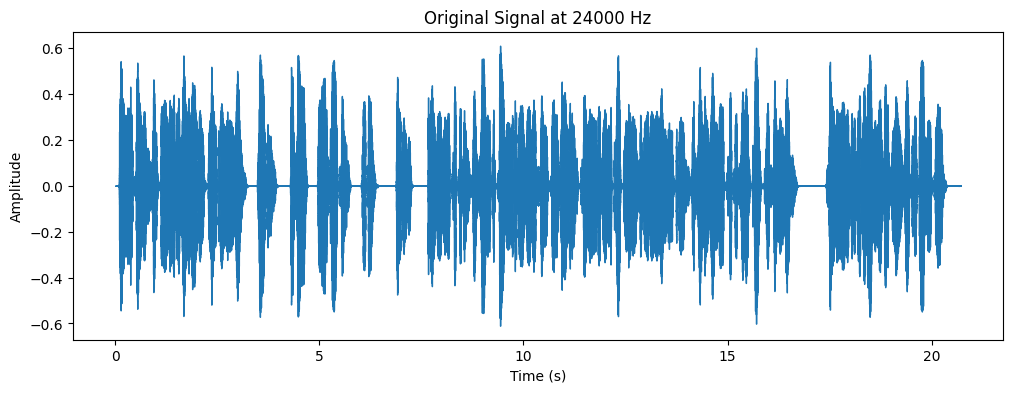

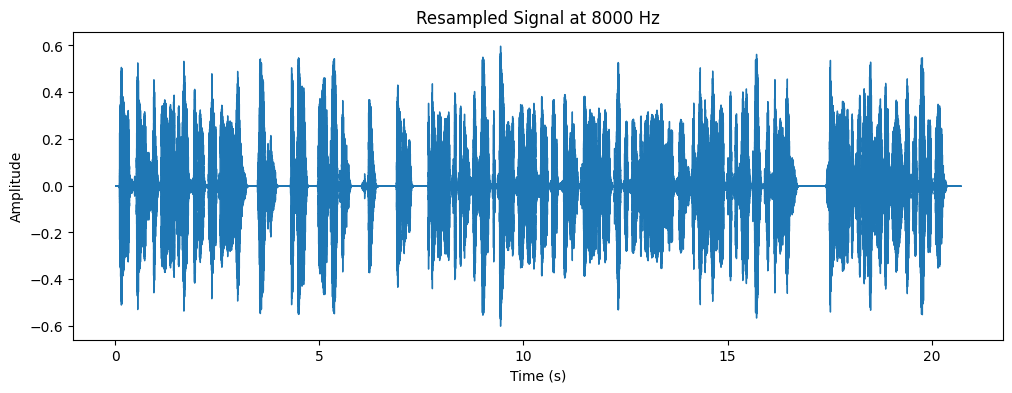

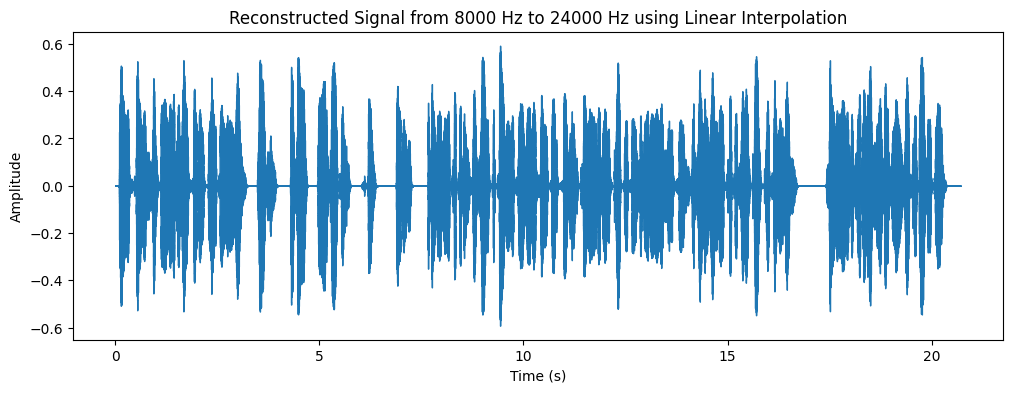

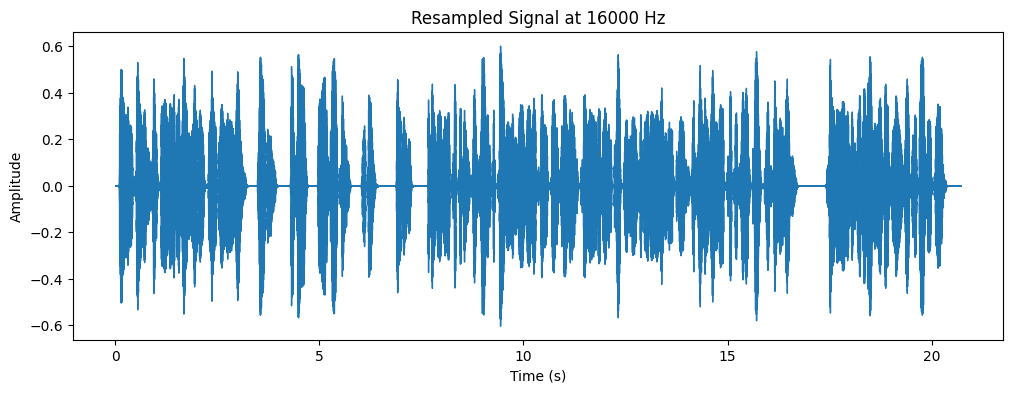

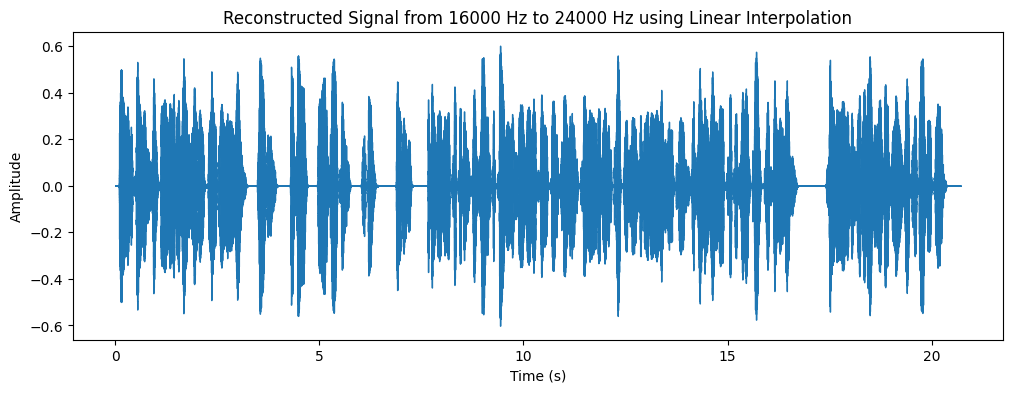

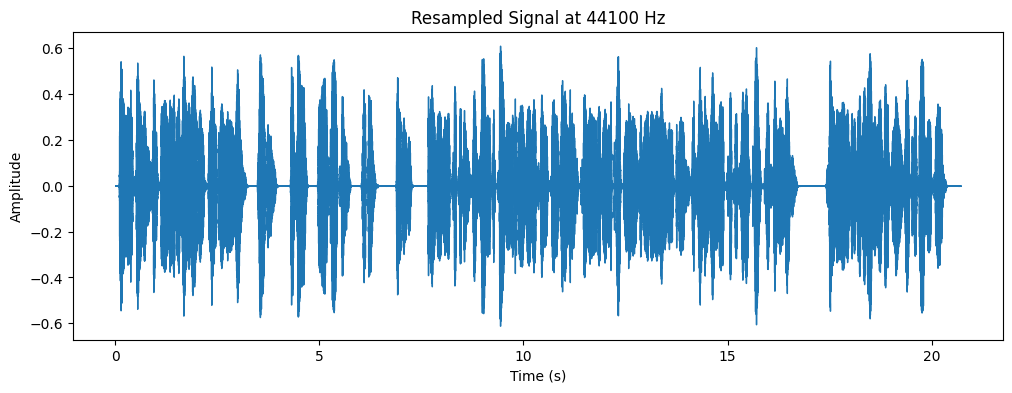

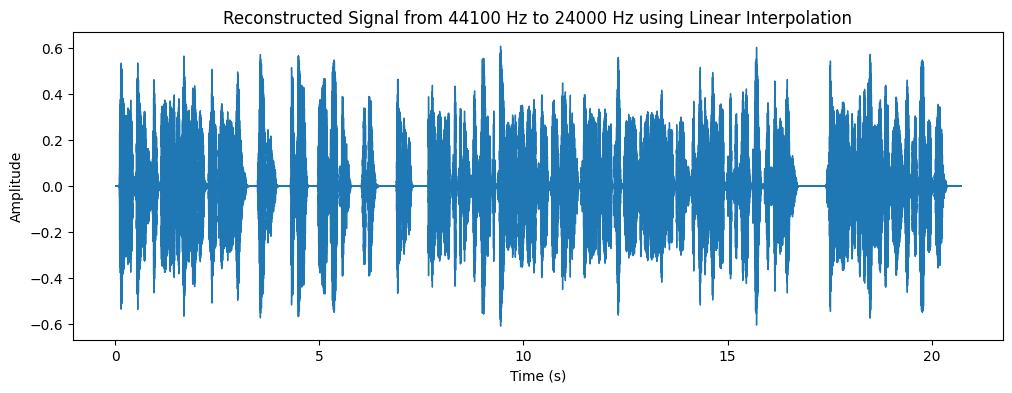

In [10]:
def reconstruct_signal(original_signal, original_sr, downsampled_signal, downsampled_sr):
    # Create time indices for the original and downsampled signals
    original_time = np.linspace(0, len(original_signal)/original_sr, num=len(original_signal))
    downsampled_time = np.linspace(0, len(original_signal)/original_sr, num=len(downsampled_signal))

    # Perform linear interpolation
    interpolator = interp1d(downsampled_time, downsampled_signal, kind='linear')

    # Reconstruct the signal by interpolating at the original time points
    reconstructed_signal = interpolator(original_time)

    return reconstructed_signal

# Plot the original signal
plt.figure(figsize=(12, 4))
librosa.display.waveshow(signal, sr=sr)
plt.title(f'Original Signal at {sr} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Resample the signal to different rates, reconstruct, and plot
for new_sr in samp_rate:
    # Resample the signal
    resampled_signal = librosa.resample(signal, orig_sr=sr, target_sr=new_sr)

    # Reconstruct the signal using linear interpolation
    reconstructed_signal = reconstruct_signal(signal, sr, resampled_signal, new_sr)

    # Plot the resampled signal
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(resampled_signal, sr=new_sr)
    plt.title(f'Resampled Signal at {new_sr} Hz')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

    # Plot the reconstructed signal
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(reconstructed_signal, sr=sr)
    plt.title(f'Reconstructed Signal from {new_sr} Hz to {sr} Hz using Linear Interpolation')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [12]:
for new_sr in samp_rate:
  mse = mean_squared_error(signal, reconstructed_signal)

  # Calculate Mean Absolute Error (MAE)
  mae = mean_absolute_error(signal, reconstructed_signal)

  # Print the errors
  print(f"Sampling Rate: {new_sr} Hz")
  print(f"Mean Squared Error (MSE): {mse}")
  print(f"Mean Absolute Error (MAE): {mae}\n")


Sampling Rate: 8000 Hz
Mean Squared Error (MSE): 0.00028661615643808347
Mean Absolute Error (MAE): 0.006896803432340405

Sampling Rate: 16000 Hz
Mean Squared Error (MSE): 0.00028661615643808347
Mean Absolute Error (MAE): 0.006896803432340405

Sampling Rate: 44100 Hz
Mean Squared Error (MSE): 0.00028661615643808347
Mean Absolute Error (MAE): 0.006896803432340405



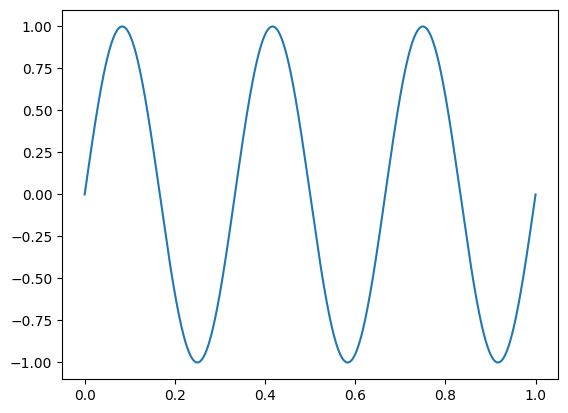

In [13]:
time=np.linspace(0,1,1000)
frequency=3
continuous_signal=np.sin(2*np.pi*frequency*time)
plt.plot(time,continuous_signal)

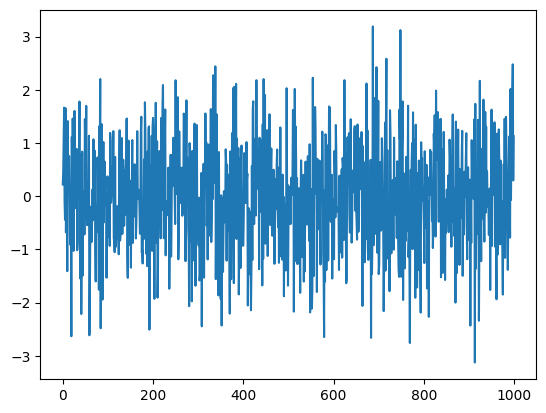

In [14]:
noise_signal=np.random.randn(1000)
plt.plot(noise_signal)

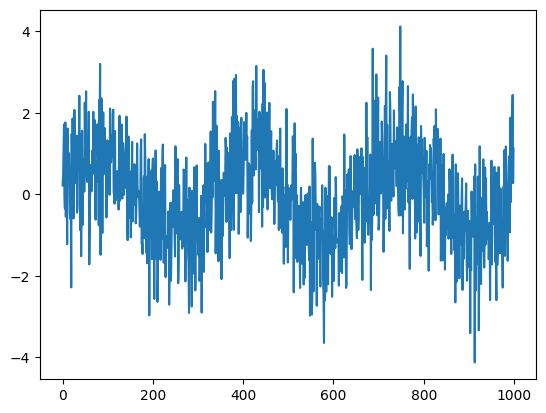

In [15]:
signal=continuous_signal+noise_signal
plt.plot(signal)

In [16]:
from scipy.signal import firwin, lfilter
numtaps=101
formant_frequencies=[500, 1500, 2500]
normalized_freqs=[f/(240000/2) for f in formant_frequencies]
vocal_tract_filter=firwin(numtaps,normalized_freqs,pass_zero=False)

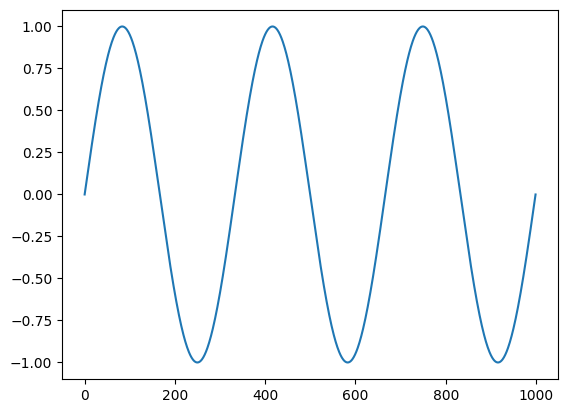

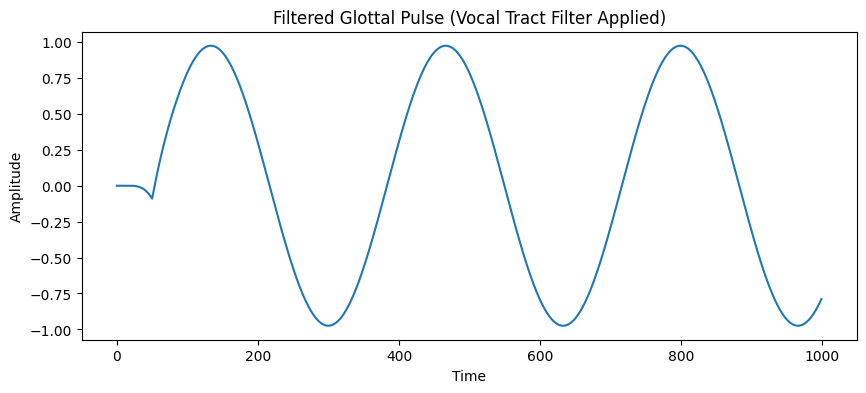

In [17]:
plt.plot(continuous_signal)
filtered_glottal_pulse = lfilter(vocal_tract_filter, 1.0, continuous_signal)
plt.figure(figsize=(10, 4))
plt.plot(filtered_glottal_pulse[:1000])
plt.title('Filtered Glottal Pulse (Vocal Tract Filter Applied)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

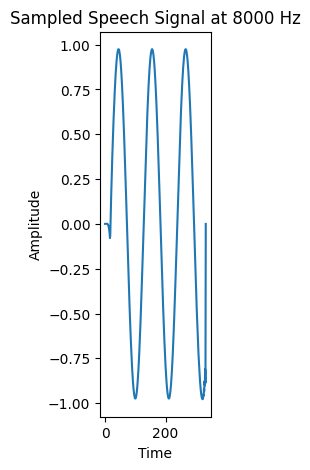

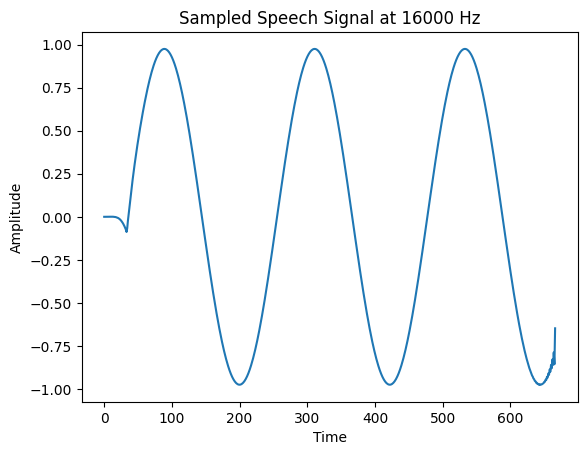

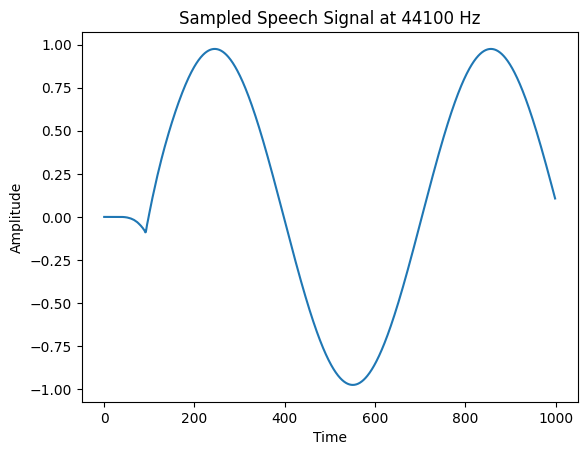

In [18]:
resampled_signals = [librosa.resample(filtered_glottal_pulse, orig_sr=24000, target_sr=rate) for rate in [8000,16000,44100]]
f = plt.figure(figsize=(10,5))
for i, signal in enumerate(resampled_signals):
    f.add_subplot(1,6,i+1)
    plt.plot(signal[:1000])
    plt.title(f'Sampled Speech Signal at {[8000,16000,44100][i]} Hz')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

In [19]:
from scipy import interpolate
for i in resampled_signals:
    x = np.arange(len(i))
    f_zero_order = interpolate.interp1d(x, i, kind='nearest')
    f_linear = interpolate.interp1d(x, i, kind='linear')
    x_new = np.linspace(0, len(i)-1, len(filtered_glottal_pulse))
    reconstructed_zero_order = f_zero_order(x_new)
    reconstructed_linear = f_linear(x_new)
    mse_zero_order = mean_squared_error(filtered_glottal_pulse[:len(reconstructed_zero_order)], reconstructed_zero_order)
    mse_linear = mean_squared_error(filtered_glottal_pulse[:len(reconstructed_linear)], reconstructed_linear)
    print(f'MSE for Zero-Order Hold: {mse_zero_order}')
    print(f'MSE for Linear Interpolation: {mse_linear}')
    print("------------------------------------------")

MSE for Zero-Order Hold: 0.0013920738357103962
MSE for Linear Interpolation: 0.0009335894741611482
------------------------------------------
MSE for Zero-Order Hold: 5.6466475017126644e-05
MSE for Linear Interpolation: 2.3127331504871297e-05
------------------------------------------
MSE for Zero-Order Hold: 0.0006675669861499888
MSE for Linear Interpolation: 0.0006539966461240202
------------------------------------------


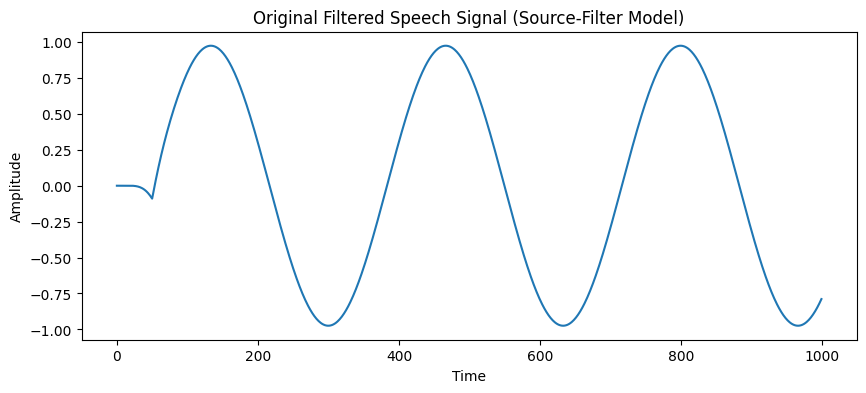

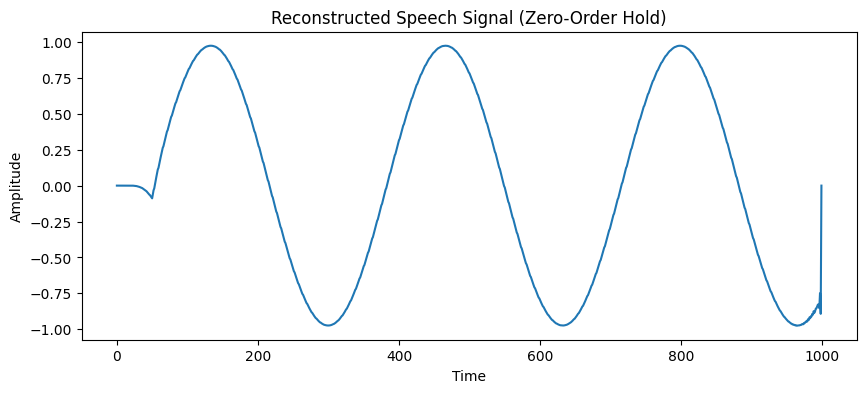

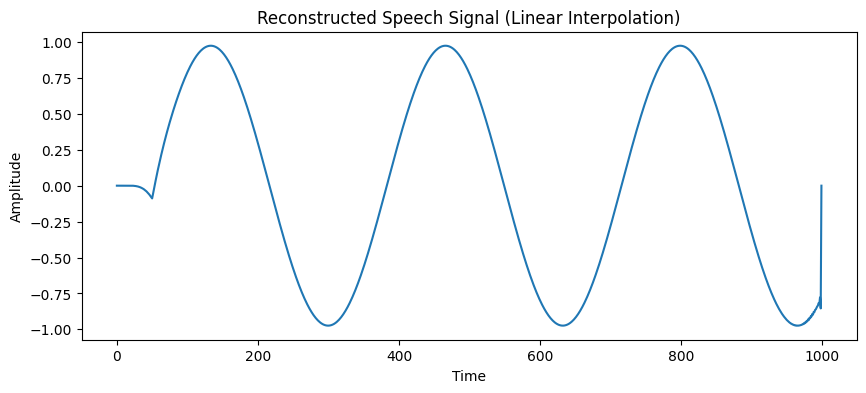

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(filtered_glottal_pulse[:1000])
plt.title('Original Filtered Speech Signal (Source-Filter Model)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(reconstructed_zero_order[:1000])
plt.title('Reconstructed Speech Signal (Zero-Order Hold)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(reconstructed_linear[:1000])
plt.title('Reconstructed Speech Signal (Linear Interpolation)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()